For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

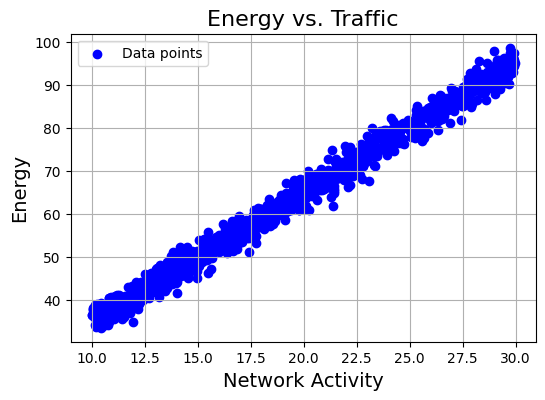

In [88]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [89]:
train_epochs = 1000

lr = LinearRegression(epochs=train_epochs)

lr.fit(data['Net_Activity'], data['Energy'])

predictions = lr.predict(data['Net_Activity'])

### Visualizing the fitted curve

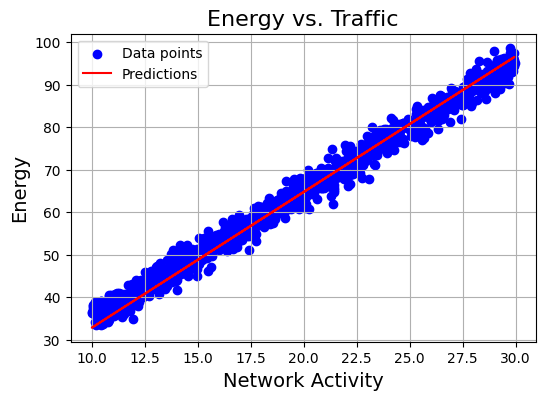

In [90]:
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], predictions, color='red', label='Predictions')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

### Deriving the resulting Energy consumption formula.

After training the linear regression model, the relationship between **Energy** and **Net Activity** is expressed as:

$$
\text{Energy} = w \cdot \text{NetActivity} + b
$$

where \(w\) is the slope and \(b\) is the intercept.

To determine these values, we can use two points on the fitted line, for example at \(x = 10\) and \(x = 30\):

- The slope is given by

$$
w = \frac{\text{Energy}(30) - \text{Energy}(10)}{30 - 10}
$$

- The intercept is then

$$
b = \text{Energy}(10) - 10 \cdot w
$$



In [91]:
predictions.sort()

w = (predictions[-1] - predictions[0]) / (30.0 - 10.0) 

b = predictions[0] - 10 * w

print(f"w = {w}")
print(f"b = {b}")

w = 3.1886413273040373
b = 0.9077223263188721


Thus the resulting energy consumption formula (rounded to the second decimal) is 

$Energy = 3.19 * Net\_Activity$ + 0.91

### Analyzing prediction error distribution

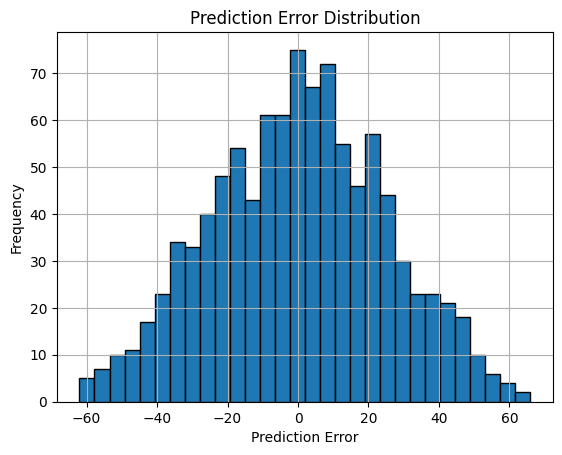

In [92]:
errors = data['Energy'] - predictions

plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.grid(True)
plt.show()

### What is an unbiased estimator?
An estimator $\hat\theta$ is said to be an unbiased estimator for a parameter $\theta$ if 

$E[\hat\theta] = \theta$

That means that, on average over many samples, the estimator neither systematically overestimates nor underestimates the true parameter.

If this isn't achieved, then $\hat\theta$ is said to be a biased estimator for $\theta$

source: https://tma4245.math.ntnu.no/parameterestimering/forventningsrett-estimator/

Looking at the Prediction Error Distribution plot, we see that the errors follow a normal distribution and centered around 0. This suggests that the model does not consistently overestimate or underestimate the true values, and therefore acts as an **unbiased estimator** of the energy consumption

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [93]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Make own train_y and test_y, and remove y and split columns from train and test sets
train_y = train['y']
train = train.drop(columns=['y', 'split'])

test_y = test['y']
test = test.drop(columns=['y', 'split'])

In [94]:
# Import your implementation
from logistic_regression import LogisticRegression # <--- This is your implementation

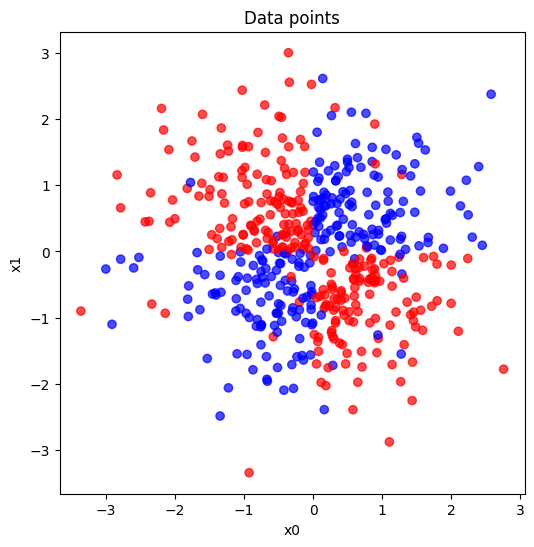

In [95]:
plt.figure(figsize=(6, 6))
plt.scatter(train['x0'], train['x1'], c=train_y, cmap="bwr", alpha=0.7) # blue for 0, red for 1
plt.xlabel('x0')
plt.ylabel('x1')
plt.title("Data points")
plt.show()

### Performance 

Achieve at least 0.88 accuracy on the test set


In [96]:
logr = LogisticRegression(learning_rate=0.1)

logr.fit(train, train_y)
y_pred = logr.predict(test)

accuracy = logr.accuracy(test_y, y_pred)
print(accuracy)


0.49


I only achieved 0.49 accuracy on the test set for the first logistic regression model. It's clear that I need to make some tweaks. After taking a better look at the earlier scatter plot i can spot that the data behaves in a particular way, except for some outliers:

$y$ is blue (0) if both $x_0$ and $x_1$ have the same signs, and $y$ is red (1) if $x_0$ and $x_1$ have different signs. This is equivalent to an **XOR** function

Essentially:

$x_0 * x_1 > 0 => 0$

$x_0 * x_1 < 0 => 1$

To improve the accuracy i will first try to add a new feature $x_2 = x_0 * x_1$ to the dataset and train the model on $[x_0, x_1, x_2]$


In [97]:
train_fe = train.copy()
test_fe = test.copy()

train_fe['x2'] = train_fe['x0'] * train_fe['x1']
test_fe['x2'] = test_fe['x0'] * test_fe['x1']

logr.fit(train_fe, train_y)
y_pred_fe = logr.predict(test_fe)

accuracy = logr.accuracy(test_y, y_pred_fe)
print(accuracy)



0.9


Adding $x_2$ as a new feature worked great and the model has now achieved greater than 0.88 accuracy on the test set!

### Discussion

##### a) Explain poor initial performance and your improvements
The first model had an accuracy of 0.49, so it essentially just guessed the binary classification randomly. This was due to the dataset not being linearly separable. 

After analyzing the scatter plot i noticed that the data was following the XOR function. To improve the accuracy I did feature engineering by adding a new feature to the dataset called $x_2$ which was the product of $x_0$ and $x_1$. 

The feature engineering made the accuracy jump to 0.9

##### b) What is the model's inductive bias. Why is it important?
Inductive bias can be defined as the set of assumptions or biases that a learning algorithm employs to make predictions on unseen data based on its training data. These assumptions are inherent in the algorithm's design and serve as a foundation for learning and generalization.
 
*source: https://www.geeksforgeeks.org/machine-learning/what-is-inductive-bias-in-machine-learning*

Before the feature engineering the logistic regression on $[x_0, x_1]$ had a linear bias, where the decision boundary was a single straight separator. This doesn't fit well with XOR, so the model fails on test data

By expanding the features with $x_2 = x_0 * x_1$ the model induces non-linear boundaries that can capture the XOR structure 




##### c) Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(train, train_y)

y_pred_clf = clf.predict(test)
accuracy = accuracy_score(test_y, y_pred_clf)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8720


So the answer is yes, `sklearn.tree.DecisionTreeClassifier` can solve the method pretty easily and effectively. The root node's splitting critera can be whether or not $x_0$ is negative or positive. Then the tree splits into whether or not $x_1$ is positive or negative. The tree will then have 4 leafnodes

##### d) Plot the ROC curve

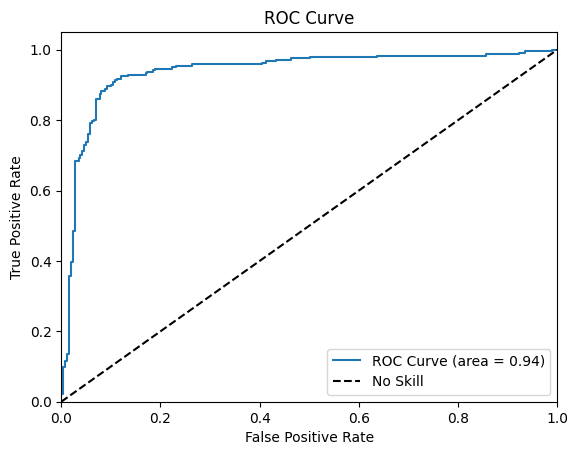

In [99]:
from sklearn.metrics import roc_curve, auc

proba_log = logr.predict_proba(test_fe)
fpr, tpr, threshold = roc_curve(test_y, proba_log)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [100]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

X_train = train.drop(columns=['target'])
y_train = train['target']

X_test = test.drop(columns=['target'])
y_test = test['target']

SHIFT = 3

def decrypt_feat(series):
    series = np.abs(series)
    series = series * (10 ** SHIFT)
    return series%2

accuracies = {}
for col in X_train.columns:

    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    # Decrypt the columns
    X_train_copy = decrypt_feat(X_train[col]).to_frame(name=col)
    X_test_copy = decrypt_feat(X_test[col]).to_frame(name=col)

    # train and test decision tree
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train_copy, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test_copy))
    accuracies[col] = acc

# find the best column
best_col = max(accuracies, key=accuracies.get)
best_acc = accuracies[best_col]

print("Correct datastream:", best_col, "with accuracy:", best_acc)

X_train[best_col] = decrypt_feat(X_train[best_col])
X_test[best_col] = decrypt_feat(X_test[best_col])

clf = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=2, min_samples_split=5)
clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score for Decision Tree Classifier: {score}")


Correct datastream: data_stream_3 with accuracy: 0.807
ROC AUC Score for Decision Tree Classifier: 0.7246309815025263


### Explain your threshold-breaking strategy. Did you change the default hyperparameters?

My threshold-breaking strategy was a combination of feature engineering and hyperparameter tuning. The initial ROC_AUC score was 0.53, this was with default hyperparameters and no feature engineering.

By multiplying the features with $10^3$ i was able to boost the ROC_AUC from 0.53 to 0.56, which wasn't major. I started tuning the hyperparameters initially with *random_state=42, max_depth=4, min_samples_leaf=2 and min_samples_split=5*, this boosted the ROC_AUC majorly to 0.69. To get to 0.72 i tried tuning the different hyperparams slightly, i figured out that *max_depth=6* was able to push the score just above 0.72, fulfilling the requirement.

### Justify ROC AUC usage. Plot and interpret ROC.

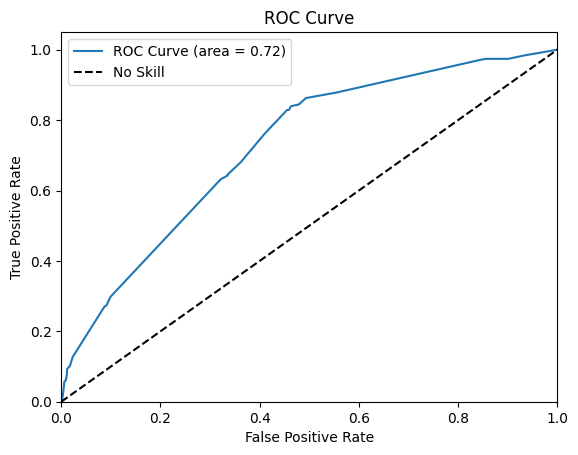

In [101]:
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

As we can see from the plot the ROC curve sits above the diagonal which indicates a performance that's better than random guessing. AUC = 0.72 indicates that the model ranks a random postive above a random negative ~72% of the time.  

### Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

In [102]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

y_prob = classifier.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC AUC Score for Random Forest Classifier: {roc_auc}")


ROC AUC Score for Random Forest Classifier: 0.7220194412876965


So `sklrean.RandomForestClassifier` and `sklearn.DecisionTreeClassifier` achieve about the same result with an ROC AUC score of ~0.72 

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [103]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [104]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

The hint in the mission description says that the columns in the test data are tampered with and suggests that I should compare the training and test distributions and try to rectify the test set. I will start by comparing the distributions

In [105]:
# Verify that the train and test set have the same amount of features
n_samples_train, n_features_train = train.shape
n_samples_test, n_features_test = test.shape

print(f"Number of train features: {n_features_train}")
print(f"Number of test features: {n_features_test}")


Number of train features: 17
Number of test features: 17


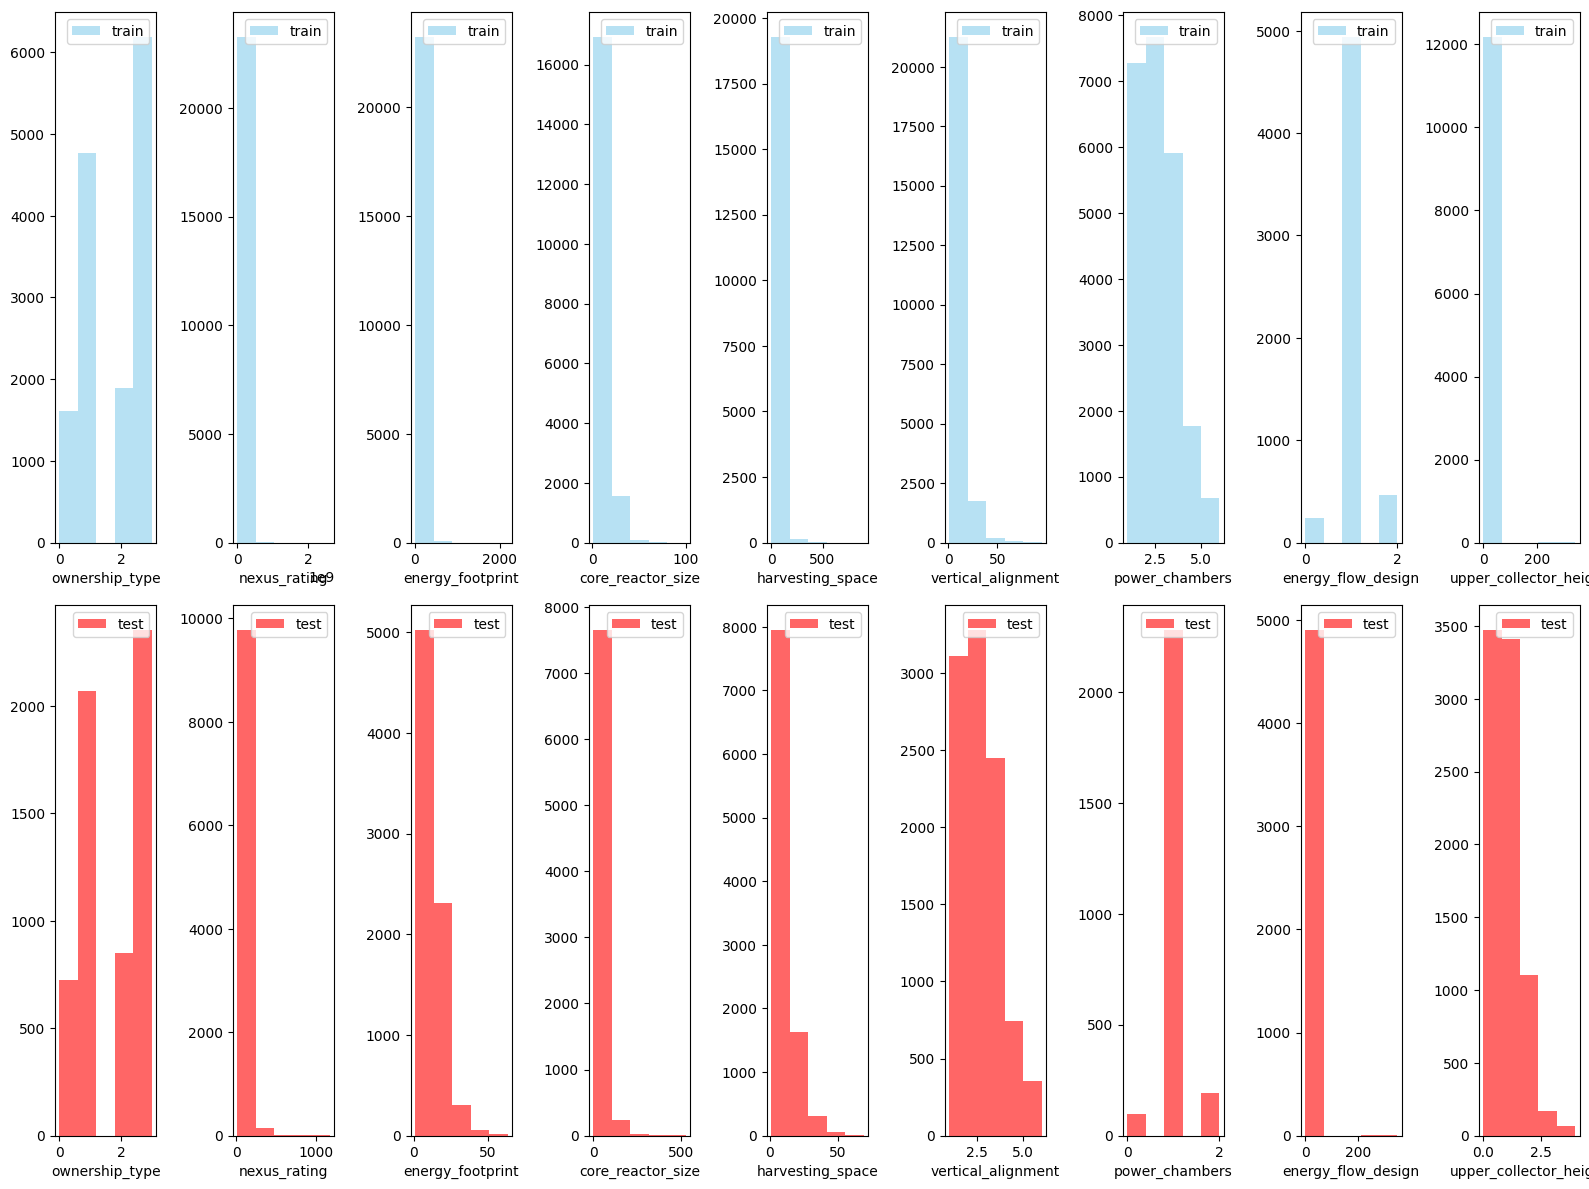

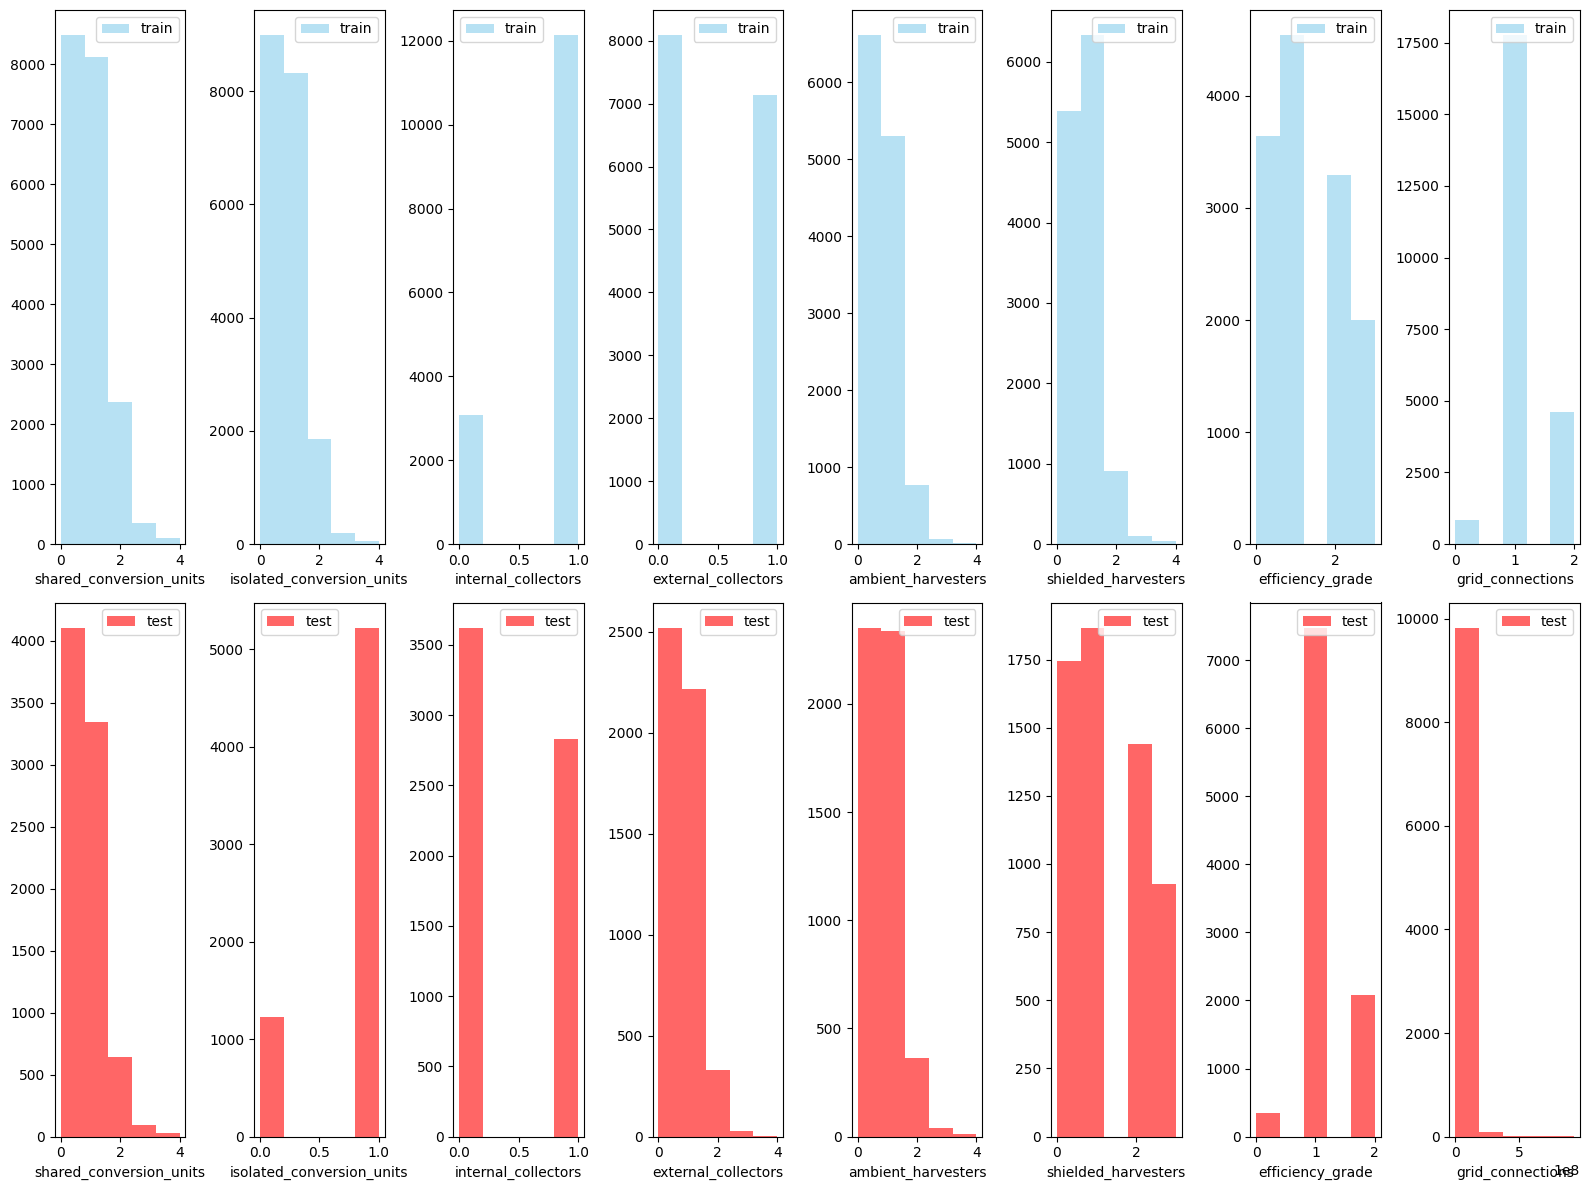

In [106]:
n_features = n_features_train # Since we verified the same no of features in train and test
features = train.columns

# Drawing histograms for each feature for both the train and test set
divider = np.ceil(n_features/2).astype(int)
first_batch = features[0:divider]
second_batch = features[divider:]

def plot_feature_hists(features, ncols=9):
    fig, axes = plt.subplots(nrows=2, ncols=ncols, figsize=(16, 12))

    for i, feat in enumerate(features):
        axes[0, i].hist(train[feat], bins=5, label="train", color="skyblue", alpha=0.6)
        axes[0, i].set_xlabel(feat)
        axes[0, i].legend()


        axes[1, i].hist(test[feat], bins=5, label="test", color="red", alpha=0.6)
        axes[1, i].set_xlabel(feat)
        axes[1, i].legend()

    plt.tight_layout()
    plt.show()

plot_feature_hists(first_batch)  
plot_feature_hists(second_batch, ncols=8)  

Based on the histograms i believe some of the columns are misplaced. To remedy this i will swap them to their correct place

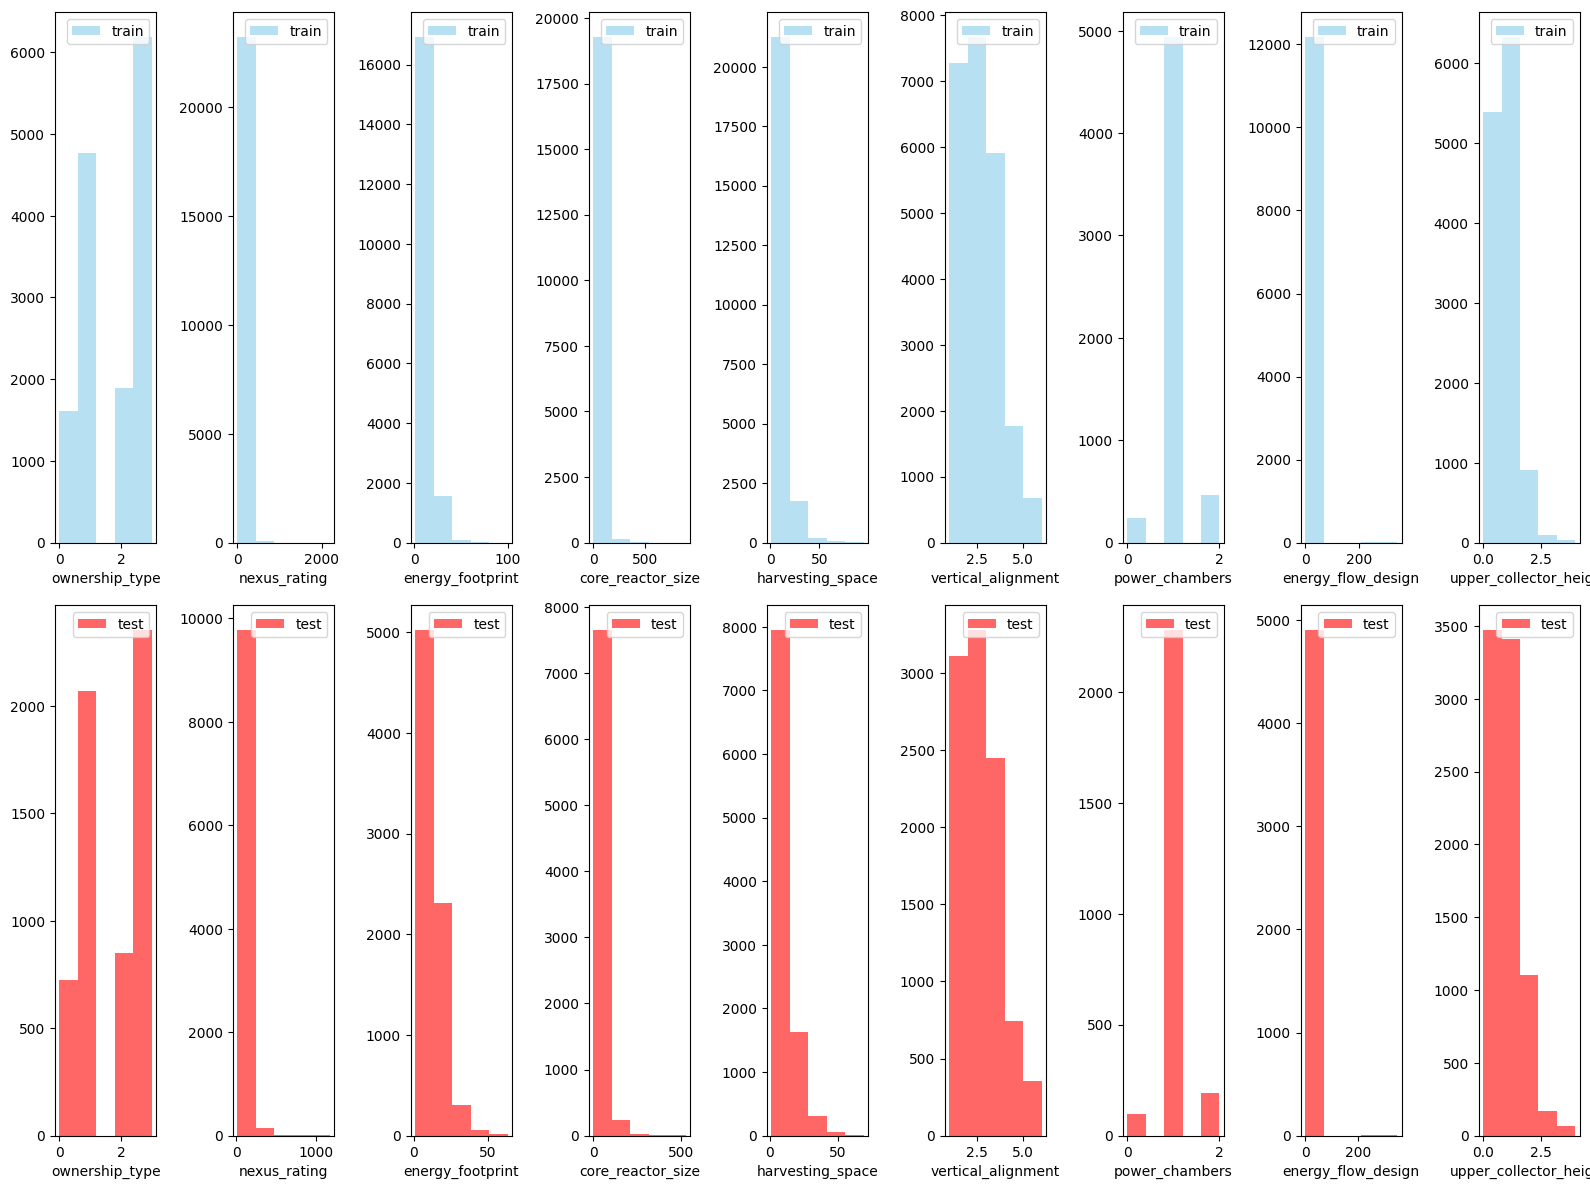

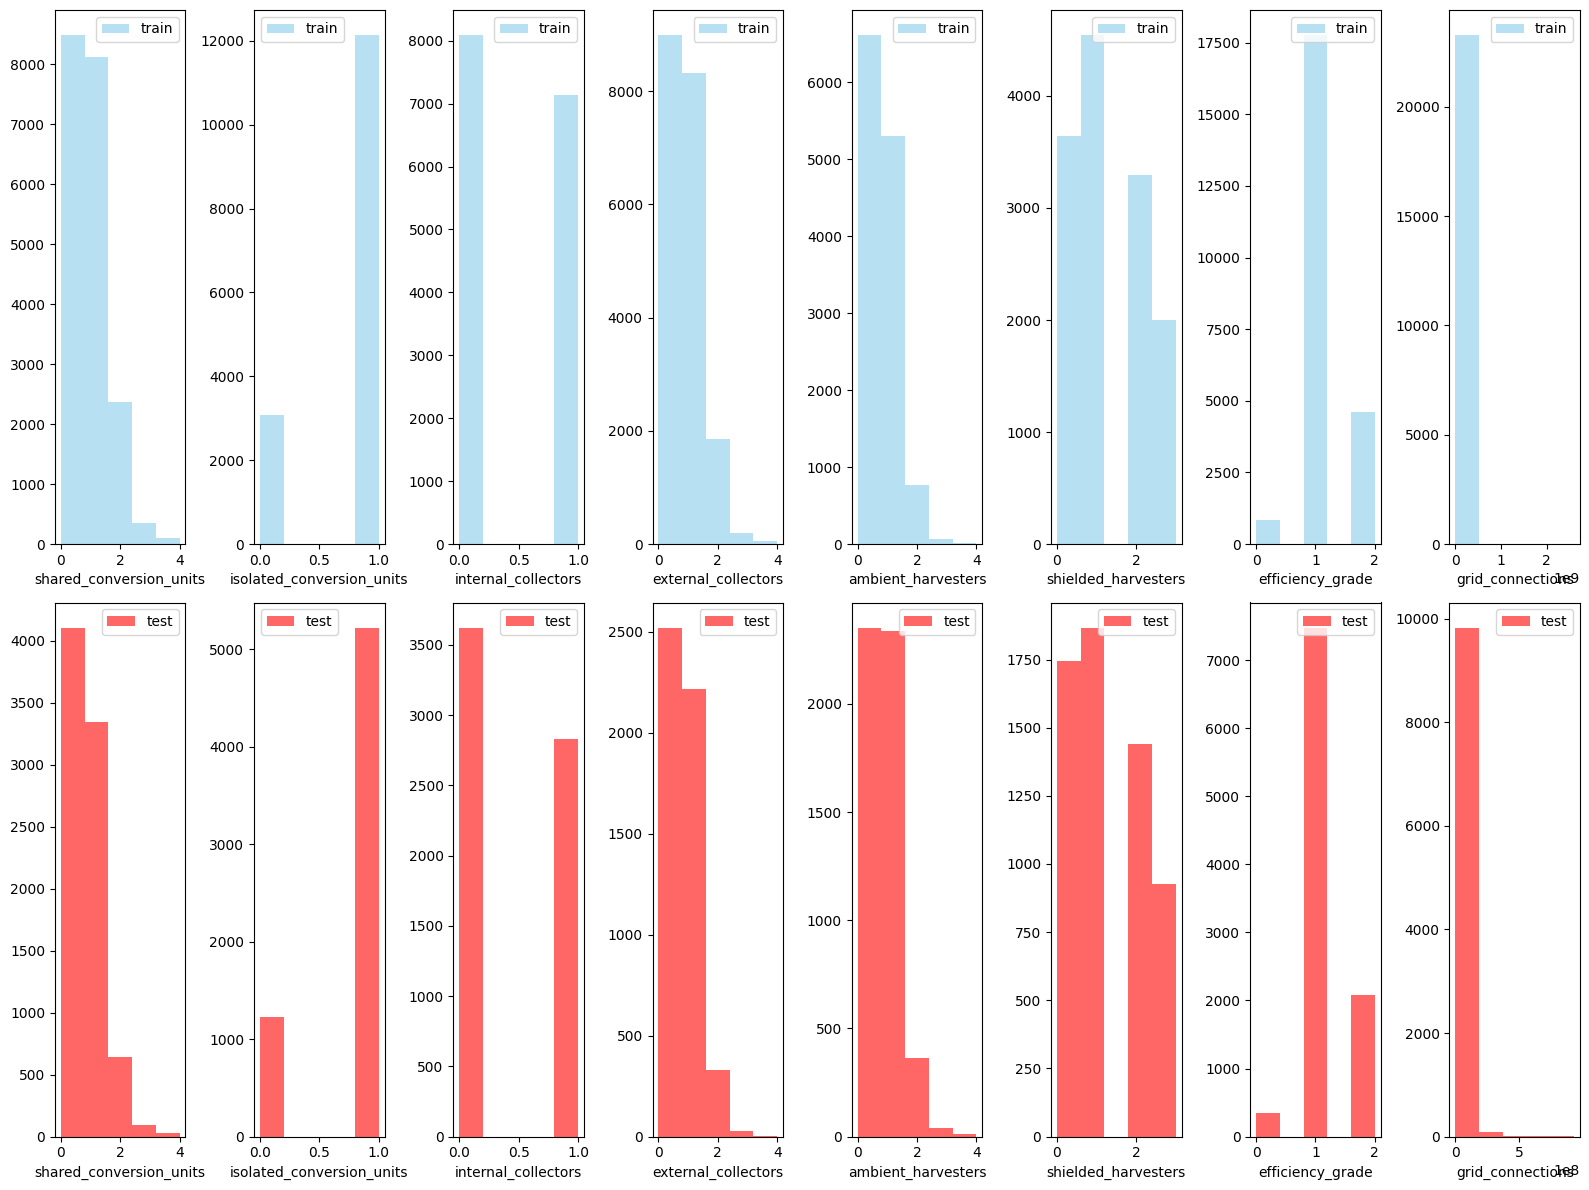

In [107]:
def swap_cols(df, col1, col2):
    df[col1], df[col2] = df[col2].copy(), df[col1].copy()

swap_cols(train, "internal_collectors", "isolated_conversion_units")  
swap_cols(train, "efficiency_grade", "grid_connections")
swap_cols(train, "shielded_harvesters", "grid_connections")
swap_cols(train, "nexus_rating", "grid_connections")
swap_cols(train, "energy_flow_design", "power_chambers")
swap_cols(train, "energy_flow_design", "upper_collector_height")
swap_cols(train, "vertical_alignment", "upper_collector_height")
swap_cols(train, "nexus_rating", "upper_collector_height")
swap_cols(train, "nexus_rating", "harvesting_space") 
swap_cols(train, "nexus_rating", "energy_footprint")
swap_cols(train, "core_reactor_size", "energy_footprint")
swap_cols(train, "external_collectors", "internal_collectors")

features = train.columns

first_batch_new = features[0:divider]
second_batch_new = features[divider:]

plot_feature_hists(first_batch_new)
plot_feature_hists(second_batch_new, ncols=8)


Now that the columns seem to be fixed I will start to implement the ensemble model. I will start by checking the RMSLE with `sklearn.RandomForestRegressor`

In [108]:
y_train = train.pop("nexus_rating")
y_test = test.pop("nexus_rating")


In [110]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(train, y_train)
y_preds = rfr.predict(test)

print('RMSLE: ', rmsle(y_test, y_preds))
print('Required RMSLE: ', 0.294)

RMSLE:  0.13513116888768953
Required RMSLE:  0.294


The `RandomForestRegressor` model achieves the requirement of an RMSLE<=0.294!

### Explain your threshold-breaking strategy
My main strategy was to look at the distributions of the features in the training and test sets. The hint said that the columns were tampered with, and by plotting histograms I noticed that some features in the test set did not line up with the same features in the training set. This suggested that some columns had been swapped. I fixed this by swapping the mismatched columns back to where they belonged. Once the data was corrected, I trained a RandomForestRegressor and got a low RMSLE score (0.136).

### Justify RMSLE usage. Why do we use this metric? Which loss function did you use?
We use RMSLE (Root Mean Squared Logarithmic Error) because the target variable (Nexus Rating) varies a lot in scale, with some very large values. RMSLE reduces the impact of very large values and instead focuses more on relative differences. This makes sense here because predicting “10 vs 20” should be seen as just as important as predicting “1000 vs 2000.”

For training, the RandomForestRegressor minimizes Mean Squared Error (MSE) by default. I then evaluated the predictions using RMSLE, since that was the requirement.

### Plot and interpret feature importances

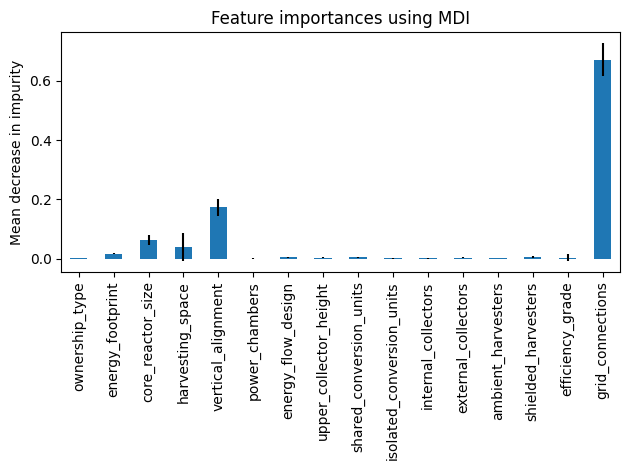

In [113]:
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
feature_names = train.columns

rfr_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rfr_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

As we can see from the feature importance plot `grid_connections` stands out by far as the most important feature. The model relied heavily on this feature to predict the `nexus_rating`. We also see that `vertical_alignment`, `core_reactor_size` and `harvesting_space` also have an say on the energy consumption, but little in comparison with `grid_connections` still. This essentially means that a few features have a lot more importance than others. 11 of the features don't add much information to the model. 

### Describe your ensembling techniques
The model I used was a Random Forest, which is an ensemble method. It combines many decision tree regressors into one model. Each tree makes a prediction, and the final result is the average of all trees. This reduces overfitting compared to a single tree and makes the predictions more stable and accurate.

### In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 
I would split the train set into subsets consisting of training and validation. This way I kind of create my own test set. I can also use cross-validation.